# Analysis of Nobel Laurets



### Content
+ Introduction: Nobel prize
+ Data description and objectives
+ Data preparation: cleaning and shaping
+ Data analysis and visualization 
+ Conclusion

## 1. Introduction: Nobel prize

Awarded for “the greatest benefit to humankind”

Between 1901 and 2019, the Nobel Prizes and the Prize in Economic Sciences were awarded 597 times to 950 people and organisations. The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the fortune of Alfred Nobel, Swedish inventor and entrepreneur. In 1968, Sveriges Riksbank established The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel, founder of the Nobel Prize. Each prize consists of a medal, a personal diploma, and a cash award.

A person or organisation awarded the Nobel Prize is called Nobel Laureate. The word “laureate” refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honour.



source: https://www.nobelprize.org/prizes/

## 2. Data description and objectives

The Nobel Prize is given to the best minds on our planet.
It is not difficult to assume that the gender ratio of laureates as well as the ratio in different eras of the western and eastern parts of the world are different
And we will consider some aspects and visually analyze in detail the Nobel Prize, taking into account such aspects as gender, age, birth month, age, as well as university

Below is data that we will be used for our analysis:

+ born country code - country where **laureate** was born 
+ died country code -  country where **laureate** died
+ gender - sex of **laureate** 
+ year - when **laureate** get his prize
+ category - category of **laureate** prize
+ share - how many people received for this research besides **laureate**
+ name of university - **laureate**'s university where he/she stady or take some degree
+ country of university - country of university
+ born month - born month
+ age - how old **laureate** are now(2019)or when he died
+ age get prize - age of **laureate** when he get prize





#### 2.1 For analysis, we will consider issues such as:
1. Base Analysis (Country, gender, university)
2. Analysis of Migration and Imigration of Nobelers:
   + Geological
   + Gender
3. Prize behavior during different Histroical eras* 
4. Analysis of Age and Month of birth

 *Historical eras:

1. World War I (1914-1918) https://en.wikipedia.org/wiki/World_War_I
2. World War II (1939-1945) https://en.wikipedia.org/wiki/World_War_II
3. Cold War (1947-1991) https://en.wikipedia.org/wiki/Cold_War


## 3. Data preparation: cleaning and shaping



Before analyzing and visualizing the data, we must sort and divide them for the convenience of work as well as optimality

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('nobel_final.csv')
df.shape


(923, 14)

In [3]:
df

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77
919,Abiy,Ahmed Ali,ET,NaN,male,2019,peace,1,NaN,NaN,NaN,Aug,44,43
920,Abhijit,Banerjee,IN,NaN,male,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Feb,59,58
921,Esther,Duflo,FR,NaN,female,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Oct,48,47


### 3.1  Data preparation

How and into which sub-groups we will divide our dataset taken from https://www.kaggle.com/ 

To answer the question we posed, we must divide into such groups:
1. by immigration abd migration 
2. by hystorical eras
3. by spheres


#### 3.1.1 by immigration abd migration

in this pice of code we create Dictionary and List for Nobelers which imigrated to other countries

we create two dictionaries **imigrate_from** (numbers of imigrated Nobeler from Country) and **imigrate_to** (numbers of migrated Nobeler to Country)

and we create three Lists where we will save **imigrated Nobelers**  

In [4]:
imigrate_from = {}
imigrate_to = {}
imigrated_nobelers = []
imigrated_male_nobelers = []
imigrated_female_nobelers = [] #we create two dictionaries and three lists
for nobeler in df.iterrows(): #go over each nobelers
    
    born_country = nobeler[1]['born_country_code']
    died_country = nobeler[1]['died_country_code']
    if born_country != died_country and not pd.isna(died_country): #check each nobelers if he/she is not died or imigrated
        imigrated_nobelers.append(nobeler) # add all imigrated nobelers
        if nobeler[1]['gender'] == 'male': 
            imigrated_male_nobelers.append(nobeler) #if nobeler's gender is male add him to List
        if nobeler[1]['gender'] == 'female':
            imigrated_female_nobelers.append(nobeler) #if nobeler's gender is female add him to List
        if born_country in imigrate_from:
            imigrate_from[born_country] += 1 
        if born_country not in imigrate_from:
            imigrate_from[born_country] = 1 
        if died_country in imigrate_to:
            imigrate_to[died_country] += 1
        else:
            imigrate_to[died_country] = 1

In [5]:
#len(imigrated_male_nobelers)
#len(imigrated_female_nobelers)

#### 3.1.2 by hystorical eras

for each hictorical eras and add Nobeler get prize in one of this eras

In [6]:
ww1 = df[df['year'] >= 1914]
ww1 = ww1.loc[ww1['year'] <= 1918]
ww2 = df[df['year'] >= 1939]
ww2 = ww2.loc[df['year'] <= 1945]
coldw = df[df['year'] >= 1947]
coldw = coldw.loc[coldw['year'] <= 1991]

## 4. Data analysis and visualization

### 4.1 Analysis of  Country, University and Gender ratio


Analys of datas such as Born country show us level of each country
After all development of science is the main reason for the development of the country

In [7]:
df = pd.read_csv('nobel_final.csv')
df.shape


(923, 14)

#### 4.1.1 Most Nobel Winner Countries


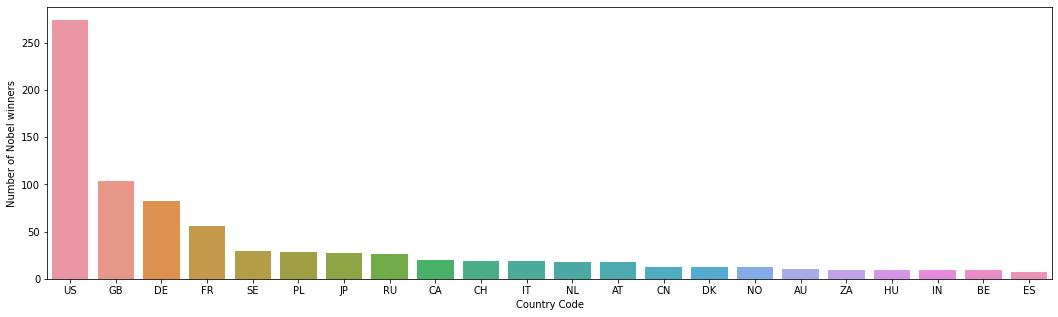

In [8]:
nobel_country = df['born_country_code'].value_counts().to_frame()
nobel_country = nobel_country[nobel_country['born_country_code'] >= 7]
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

**USA, Great British, Deutschland(Germany)** and **France** has most winners respectively 

#### 4.1.2 Top Universities with Nobel winers


In [9]:
nobel_university_winner = df['name_of_university'].value_counts().to_frame()
nobel_university_winner = nobel_university_winner[nobel_university_winner['name_of_university'] >= 7]


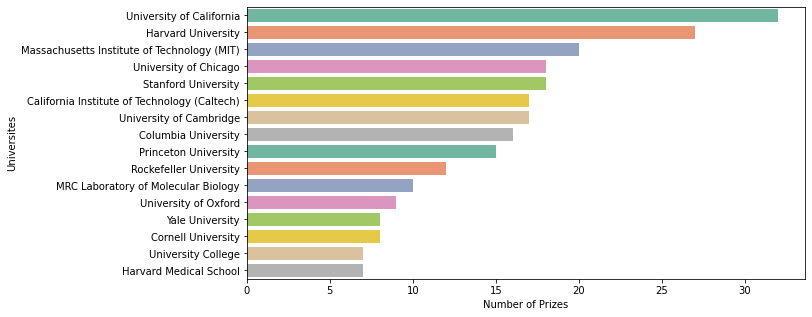

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_university_winner.index , x = 'name_of_university' ,data = nobel_university_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prizes')
plt.ylabel('Universites')
plt.show()

from this graph we can notice that University of California and Harvard has big detachment

#### 4.1.3 Gender ratio for each sphere

In [11]:
gender_winner = df.groupby('category')['gender'].value_counts().to_frame()
gender_winner.columns = ['number of winners']
gender_winner.reset_index(inplace=True)

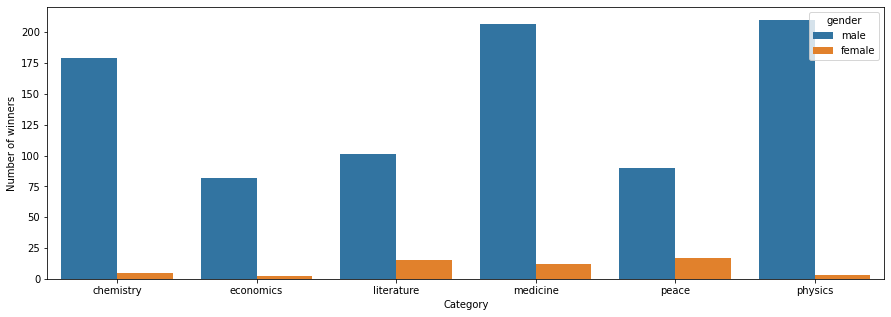

In [12]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'category' , y = 'number of winners' , hue = 'gender' ,data = gender_winner)
plt.xlabel('Category')
plt.ylabel('Number of winners')
plt.show()

The ratio of men and women is colossal in every area, however in category 'peace' ratio is less 

### 4.2 Analysis of Imigration and Migration

Migration and emigration of scientists can greatly affect the course of the science of history as well as various events

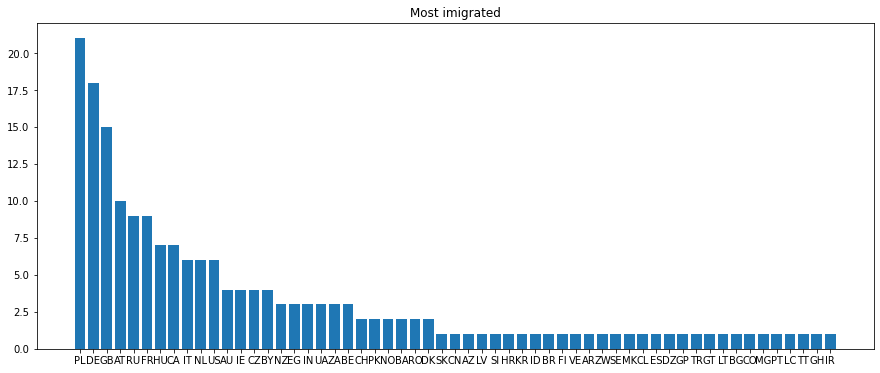

In [13]:
plt.rcParams["figure.figsize"] = [15,6]
vals = sorted(imigrate_from.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots()
ax.bar(range(len(vals)), [t[1] for t in vals]  , align="center")
ax.set_xticks(range(len(vals)))
ax.set_xticklabels([t[0] for t in vals])
plt.title('Most imigrated')
plt.show()

we can see that most Nobelers imigrated from Poland, Germany and Great Britsh (the reason for this may be WWII)

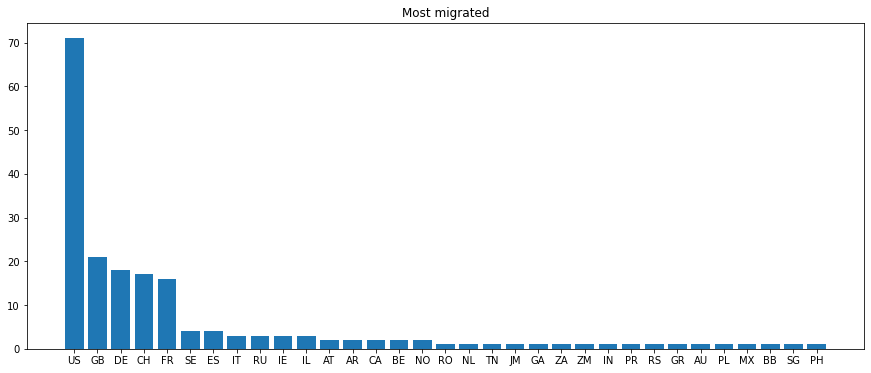

In [14]:
plt.rcParams["figure.figsize"] = [15,6]
vals = sorted(imigrate_to.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots()
ax.bar(range(len(vals)), [t[1] for t in vals]  , align="center")
ax.set_xticks(range(len(vals)))
ax.set_xticklabels([t[0] for t in vals])
plt.title('Most migrated')
plt.show()

we can see that most people (Nobelers) migrated to USA (this can be couse for big number of US nobelers)

In [15]:
male_ww1 = ww1['gender'].value_counts()['male']
female_ww1 = len(ww1) - male_ww1
male_ww2 = ww2['gender'].value_counts()['male']
female_ww2 = ww2['gender'].value_counts()['female']
male_coldw = coldw['gender'].value_counts()['male']
female_coldw = coldw['gender'].value_counts()['female']

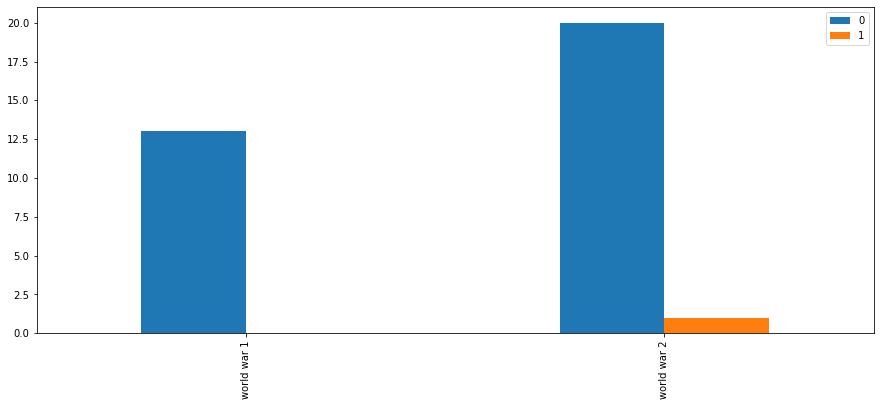

In [16]:
X = ['world war 1','world war 2']
male = [male_ww1,male_ww2]
female = [female_ww1,female_ww2]

ratio = pd.DataFrame(np.c_[male,female], index = X)
ratio.plot.bar()

plt.show()

despite the fact that more men participated in the war, this did not affect the sex ratio

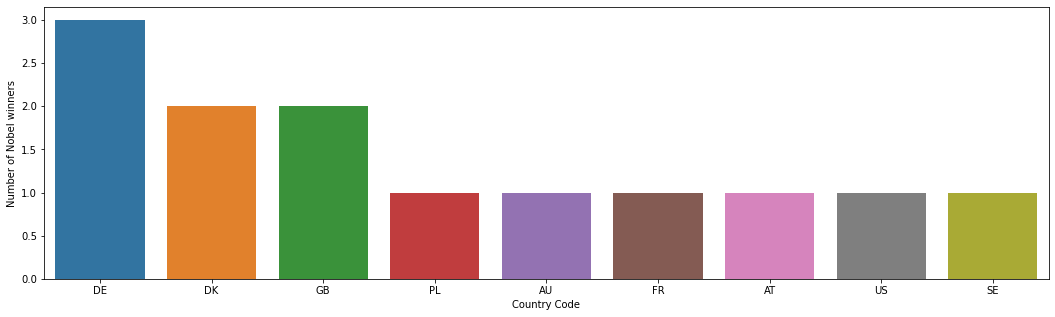

In [17]:
nobel_country = ww1['born_country_code'].value_counts().to_frame()
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

in first world war Germany won most prize

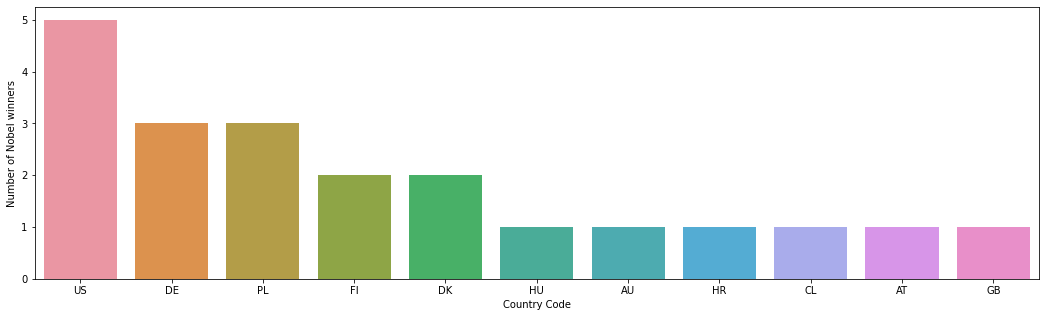

In [18]:
nobel_country = ww2['born_country_code'].value_counts().to_frame()
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

in second world war most nobelers was from USA and Poland and Germany

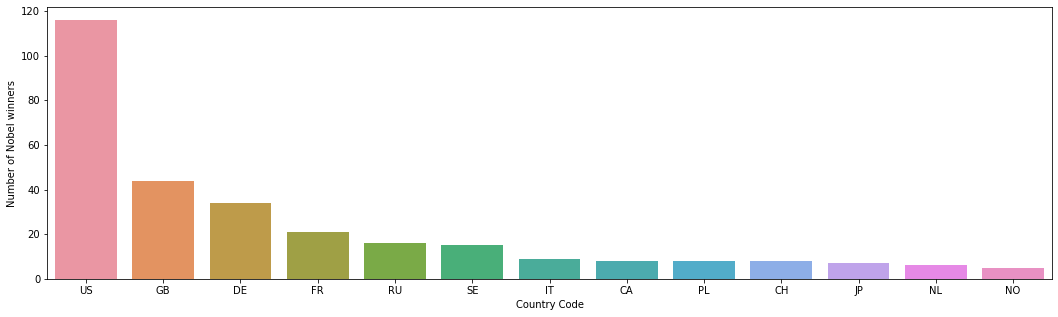

In [19]:
nobel_country = coldw['born_country_code'].value_counts().to_frame()
nobel_country = nobel_country[nobel_country['born_country_code'] >= 5]
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

While Cold War USA won most Nobel

In [20]:
print(str(df['age_get_prize'].mean()) + ' is average of age when get prize in all of Nobel winners from 1901 untill now.')

59.82340195016251 is average of age when get prize in all of Nobel winners from 1901 untill now.


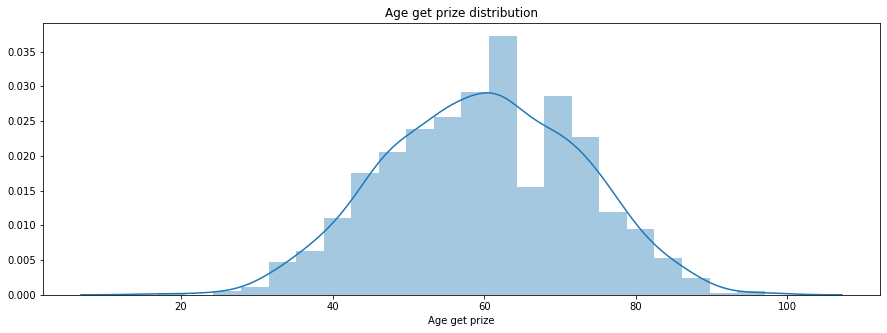

In [21]:
plt.figure(figsize=(15, 5))
sns.distplot(df['age_get_prize'])
plt.xlabel('Age get prize')
plt.title('Age get prize distribution')
plt.show()

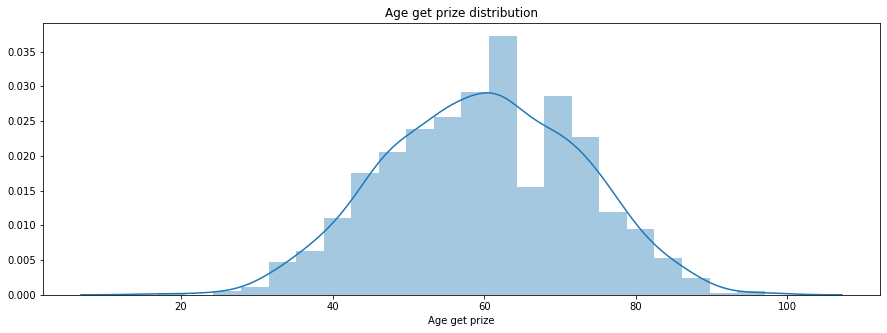

In [22]:
plt.figure(figsize=(15, 5))
sns.distplot(df['age_get_prize'])
plt.xlabel('Age get prize')
plt.title('Age get prize distribution')
plt.show()

<Figure size 1080x360 with 0 Axes>

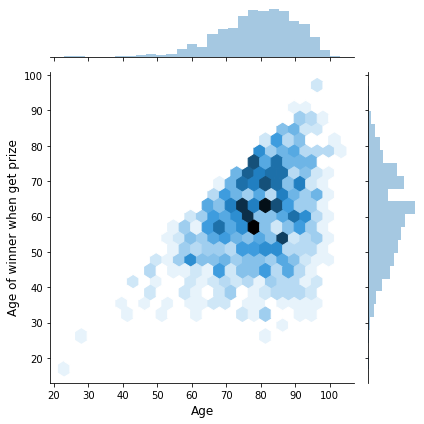

In [23]:
plt.figure(figsize=(15, 5))
plot = sns.jointplot(x='age', y='age_get_prize' , kind='hex' ,data=df)
plot.set_axis_labels('x', 'y', fontsize=12)
plot.ax_joint.set_xlabel('Age')
plot.ax_joint.set_ylabel('Age of winner when get prize')
plt.tight_layout()

# i don't own this code, sourse: https://github.com/zlkrnniskandar/Nobel-Prize-Winner-DataVisualizations/blob/master/notebook.ipynb

As you can see, the distribution of age is normal, but biased to the left, and the distribution of age upon receipt of the prize is normal. A glance shows us that they have a positive relationship and correlation.

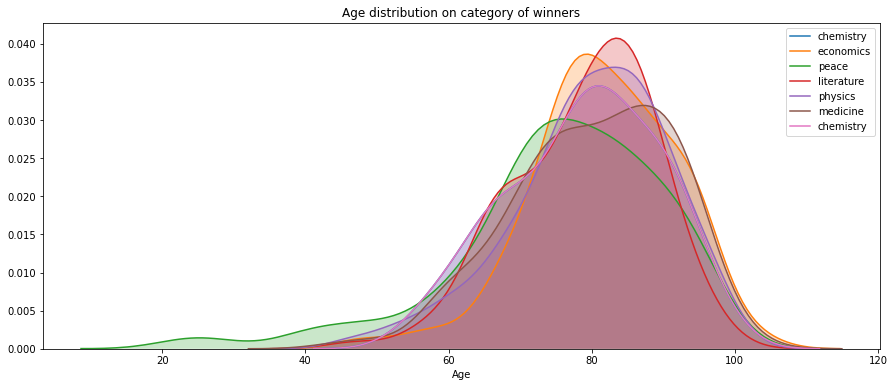

In [24]:
plt.figure(figsize=(15, 6))
sns.kdeplot(df.age[df.category == 'chemistry'], label='chemistry', shade=True)
sns.kdeplot(df.age[df.category == 'economics'], label='economics', shade=True)
sns.kdeplot(df.age[df.category == 'peace'], label='peace', shade=True)
sns.kdeplot(df.age[df.category == 'literature'], label='literature', shade=True)
sns.kdeplot(df.age[df.category == 'physics'], label='physics', shade=True)
sns.kdeplot(df.age[df.category == 'medicine'], label='medicine', shade=True)
sns.kdeplot(df.age[df.category == 'chemistry'], label='chemistry', shade=True)
plt.xlabel('Age')
plt.title('Age distribution on category of winners')
plt.show()

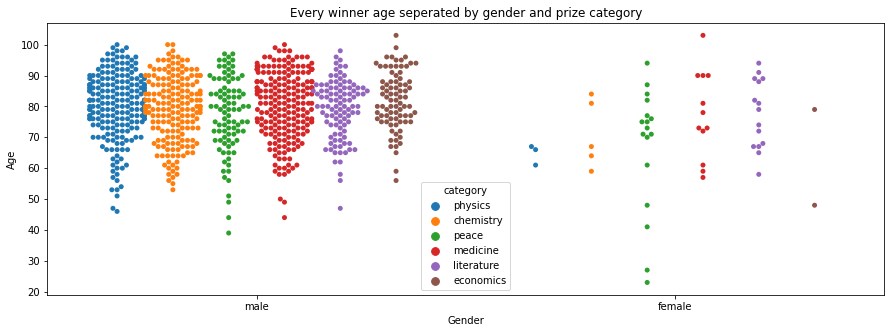

In [25]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='gender', y='age',hue = 'category', dodge=True , data=df)
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

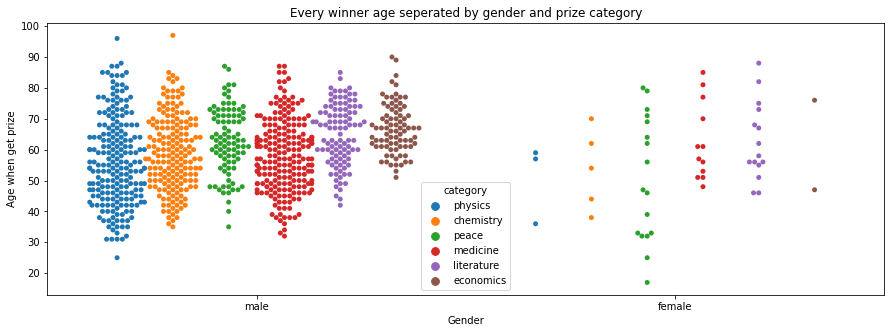

In [26]:
plt.figure(figsize=(15, 5))
sns.swarmplot(x='gender', y='age_get_prize',hue = 'category', dodge=True , data=df)
plt.ylabel('Age when get prize')
plt.xlabel('Gender')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

We can see that most people get Nobel 60 year or near to Nobel

In [27]:
born_month_winner = df['born_month'].value_counts().to_frame()

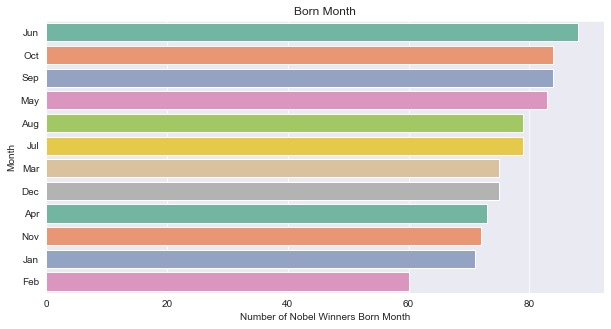

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(y = born_month_winner.index , x = 'born_month' ,data = born_month_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Nobel Winners Born Month')
plt.ylabel('Month')
plt.title('Born Month')


plt.show()

We can see that most Nobelers get prizes was born in June,September,October

# 5 Conclusion 

The Nobel Prize is one of the most significant prizes in the world, this prize can reflect the problems or strengths of the country, since development is directly proportional to science.

And by analyzing the data on the Nobel Prize, we can come to some conclusions

### 5.1 Problems of Gender ratio

despite the attempts of the world community to make the sex ratio equal, we see that in the world of science men are still the main

### 5.2 USA-POLAND_GERMANY

we see that history has influenced science, and the relocation of scientists due to historical events has influenced the country's science (so far, the number of Nobel Prize winners), this example can be the science of the USA, Poland and Germany

### 5.3 Age of Nobelers

we see that the average age of scientists is 60 years old, and this proves and shows us that science is the fruits of long years of work

##### in general, we see that developed countries receive more premium than less developed ones, and this shows that developed countries are more concerned about science